In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error


# Keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import EarlyStopping
from keras import utils

# Utility
import numpy as np
import time

In [2]:
#Importing Dataset
data = pd.read_csv('Datasets/cleaned_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

In [3]:
# making a new dataset with only numerical data
numer_data = data.select_dtypes(include=['float64','int64'])
numer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_total_tracks  1266 non-null   float64
 1   duration_ms         1266 non-null   float64
 2   popularity          1266 non-null   float64
 3   danceability        1266 non-null   float64
 4   energy              1266 non-null   float64
 5   key                 1266 non-null   float64
 6   loudness            1266 non-null   float64
 7   mode                1266 non-null   float64
 8   speechiness         1266 non-null   float64
 9   acousticness        1266 non-null   float64
 10  instrumentalness    1266 non-null   float64
 11  liveness            1266 non-null   float64
 12  valence             1266 non-null   float64
 13  tempo               1266 non-null   float64
 14  time_signature      1266 non-null   float64
 15  artist_songs        1266 non-null   float64
 16  artist

## Machine Learning model - Neural Network

In [4]:
# Split into train and test dataset.
data_train, data_test = train_test_split(numer_data, test_size=0.2, random_state=42)
print("TRAIN size:", len(data_train))
print("TEST size:", len(data_test))

TRAIN size: 1012
TEST size: 254


In [5]:
x_train = data_train.drop(['popularity', 'time_signature'], axis = 1).values
x_train

array([[0.11235955, 0.09324158, 0.58732057, ..., 0.19585245, 0.14054054,
        0.02666667],
       [0.16853933, 0.09595896, 0.79186603, ..., 0.27785684, 0.27702703,
        0.84518519],
       [0.1011236 , 0.11722543, 0.59449761, ..., 0.39201621, 0.06351351,
        0.07925926],
       ...,
       [0.07865169, 0.14884733, 0.19497608, ..., 0.69624001, 0.31081081,
        0.13851852],
       [0.14606742, 0.08290859, 0.33971292, ..., 0.245111  , 0.19459459,
        0.00666667],
       [0.11235955, 0.23380658, 0.25837321, ..., 0.16413586, 0.27567568,
        0.20814815]])

In [6]:
x_test = data_test.drop(['popularity', 'time_signature'], axis = 1).values
x_test

array([[0.05617978, 0.14133498, 0.66746411, ..., 0.51726241, 0.18648649,
        0.00666667],
       [0.16853933, 0.08154934, 0.31578947, ..., 0.61617342, 0.10405405,
        0.01037037],
       [0.15730337, 0.19202342, 0.20813397, ..., 0.66545103, 0.14189189,
        0.01851852],
       ...,
       [0.16853933, 0.16839201, 0.78229665, ..., 0.4999174 , 0.1972973 ,
        0.27111111],
       [0.13483146, 0.12457278, 0.62440191, ..., 0.47503717, 0.4972973 ,
        0.53777778],
       [0.13483146, 0.06887162, 0.54066986, ..., 0.69025503, 0.4972973 ,
        0.53777778]])

In [7]:
y_train = data_train['popularity'].values
y_train

array([0.7311828 , 0.82795699, 0.68817204, ..., 0.88172043, 0.5483871 ,
       0.82795699])

In [8]:
y_test = data_test['popularity'].values
y_test

array([0.30107527, 0.66666667, 0.70967742, 0.01075269, 0.64516129,
       0.65591398, 0.72043011, 0.55913978, 0.84946237, 0.88172043,
       0.61290323, 0.69892473, 0.02150538, 0.37634409, 0.80645161,
       0.56989247, 0.60215054, 0.92473118, 0.72043011, 0.        ,
       0.        , 0.56989247, 0.60215054, 0.66666667, 0.83870968,
       0.52688172, 0.69892473, 0.43010753, 0.61290323, 0.72043011,
       0.40860215, 0.64516129, 0.80645161, 0.88172043, 0.74193548,
       0.58064516, 0.72043011, 0.04301075, 0.86021505, 0.68817204,
       0.88172043, 0.64516129, 0.82795699, 0.66666667, 0.83870968,
       0.77419355, 0.8172043 , 0.75268817, 0.        , 0.2688172 ,
       0.6344086 , 0.83870968, 0.68817204, 0.65591398, 0.20430108,
       0.53763441, 0.67741935, 0.38709677, 0.8172043 , 0.51612903,
       0.50537634, 0.90322581, 0.92473118, 0.61290323, 0.35483871,
       0.51612903, 0.76344086, 0.83870968, 0.86021505, 0.53763441,
       0.76344086, 0.84946237, 0.43010753, 0.62365591, 0.93548

In [9]:
# Building Model
callback = EarlyStopping(monitor='val_loss', patience=8)
model = Sequential()
  
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse')

model_1 = Sequential()
  
model_1.add(Dense(15, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(5, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

model_2 = Sequential()
  
model_2.add(Dense(43, activation='relu'))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')

2022-04-23 20:49:43.764585: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test),
         callbacks = callback)

Epoch 1/80
32/32 [==============================] - 1s 7ms/step - loss: 0.2559 - val_loss: 0.1028
Epoch 2/80
32/32 [==============================] - 0s 3ms/step - loss: 0.1966 - val_loss: 0.0682
Epoch 3/80
32/32 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.0611
Epoch 4/80
32/32 [==============================] - 0s 2ms/step - loss: 0.1218 - val_loss: 0.0583
Epoch 5/80
32/32 [==============================] - 0s 2ms/step - loss: 0.1009 - val_loss: 0.0534
Epoch 6/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0967 - val_loss: 0.0544
Epoch 7/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0907 - val_loss: 0.0508
Epoch 8/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0813 - val_loss: 0.0484
Epoch 9/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0740 - val_loss: 0.0482
Epoch 10/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0709 - val_loss: 0.0464
Epoch 11/80
32/32 [

<AxesSubplot:>

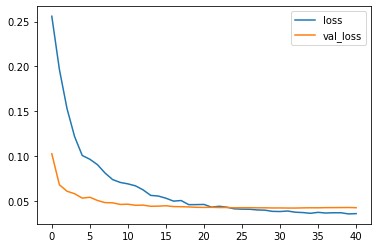

In [11]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [12]:
predictions = model.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.632876,0.301075
1,0.622410,0.666667
2,0.626283,0.709677
3,0.628516,0.010753
4,0.637588,0.645161
5,0.645293,0.655914
6,0.663128,0.720430
7,0.638882,0.559140
8,0.671178,0.849462
9,0.637522,0.881720


In [13]:
mean_absolute_error(y_test,predictions)

0.15167593821755776

In [14]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.20671855801380068

In [15]:
model_1.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test),
         callbacks = callback)

Epoch 1/80
32/32 [==============================] - 1s 6ms/step - loss: 0.3867 - val_loss: 0.2086
Epoch 2/80
32/32 [==============================] - 0s 2ms/step - loss: 0.1250 - val_loss: 0.0836
Epoch 3/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0886 - val_loss: 0.0828
Epoch 4/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0751 - val_loss: 0.0774
Epoch 5/80
32/32 [==============================] - 0s 4ms/step - loss: 0.0667 - val_loss: 0.0697
Epoch 6/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0578 - val_loss: 0.0703
Epoch 7/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0722
Epoch 8/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0570 - val_loss: 0.0672
Epoch 9/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0507 - val_loss: 0.0678
Epoch 10/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0465 - val_loss: 0.0633
Epoch 11/80
32/32 [

<AxesSubplot:>

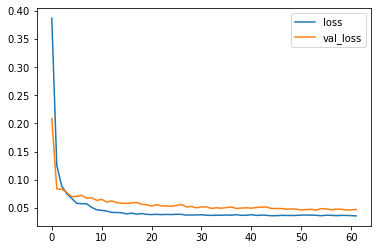

In [16]:
model_1_losses = pd.DataFrame(model_1.history.history)
model_1_losses.plot()

In [17]:
predictions = model_1.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.579174,0.301075
1,0.539062,0.666667
2,0.543439,0.709677
3,0.585102,0.010753
4,0.578119,0.645161
5,0.580760,0.655914
6,0.577628,0.720430
7,0.539982,0.559140
8,0.585521,0.849462
9,0.571614,0.881720


In [18]:
mean_absolute_error(y_test,predictions)

0.174340172302621

In [19]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.21704607951869695

In [20]:
model_2.fit(x=x_train, y=y_train, epochs=80, 
          validation_data=(x_test,y_test))

Epoch 1/80
32/32 [==============================] - 1s 7ms/step - loss: 0.0905 - val_loss: 0.0576
Epoch 2/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0498 - val_loss: 0.0503
Epoch 3/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0439 - val_loss: 0.0470
Epoch 4/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.0457
Epoch 5/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0462
Epoch 6/80
32/32 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0448
Epoch 7/80
32/32 [==============================] - 0s 4ms/step - loss: 0.0381 - val_loss: 0.0451
Epoch 8/80
32/32 [==============================] - 0s 3ms/step - loss: 0.0377 - val_loss: 0.0453
Epoch 9/80
32/32 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.0440
Epoch 10/80
32/32 [==============================] - 0s 2ms/step - loss: 0.0367 - val_loss: 0.0443
Epoch 11/80
32/32 [

<AxesSubplot:>

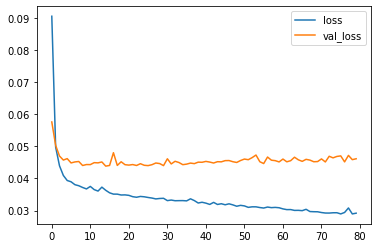

In [21]:
model_2_losses = pd.DataFrame(model_2.history.history)
model_2_losses.plot()

In [22]:
predictions = model_2.predict(x_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

,Predict,Actual
0,0.534470,0.301075
1,0.621871,0.666667
2,0.633360,0.709677
3,0.717811,0.010753
4,0.461675,0.645161
5,0.647107,0.655914
6,0.649519,0.720430
7,0.619333,0.559140
8,0.777429,0.849462
9,0.653493,0.881720


In [23]:
mean_absolute_error(y_test,predictions)

0.16184412122363212

In [24]:
print("RMSE: ")
np.sqrt(mean_squared_error(y_test,predictions))

RMSE: 


0.21475256558884648